In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import rfpimp
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.model_selection import train_test_split, StratifiedKFold

sys.path.append('../')
from utils.utils import plot_feature_imp_v1, plot_corr_matrix
from utils.feature_imp import (oob_accuracy,
                               permutation_importances,
                               permutation_importances_cv,
                               drop_column_importances,
                               drop_column_importances_cv)

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('../data/rent.txt')
df.head()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1


In [4]:
# Convert to numpy
X_train = df.drop(['interest_level'], axis=1)
y_train = df['interest_level']
y_train = pd.Series(y_train).map({1: 0, 2: 1, 3: 2})
print(f'Shape : {X_train.shape}, {y_train.shape}')

Shape : (49352, 5), (49352,)


In [5]:
# Create CV object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Sklearn feature importance

In [6]:
rf_clf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=5,
                                oob_score=True,
                                n_jobs=-1)

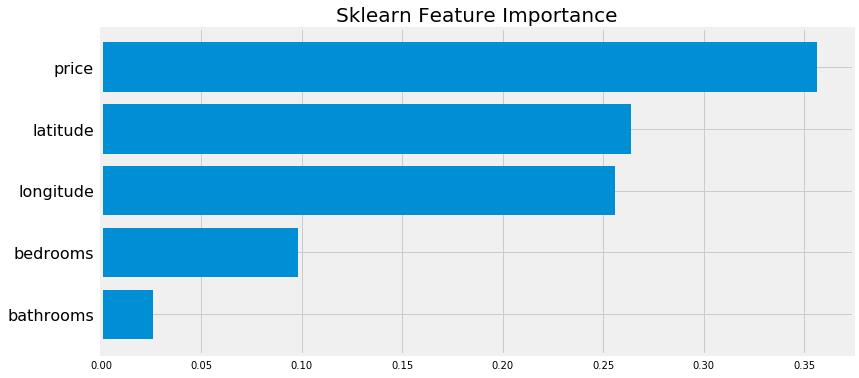

In [7]:
plot_feature_imp_v1(rf_clf, X_train, y_train, X_train.columns,
                    mode='sklearn', title='Sklearn Feature Importance')

# Permutation feature importance

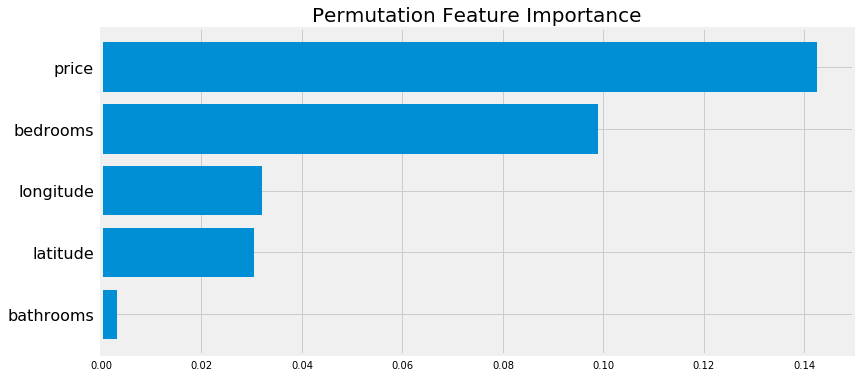

In [8]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='permutation', title='Permutation Feature Importance')

# Drop Column Feature Importance

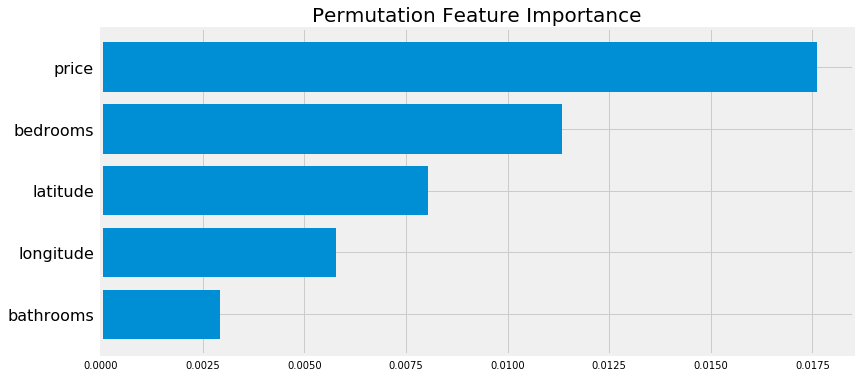

In [9]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='drop_column', title='Permutation Feature Importance')

# Add Feature Randomly Distributed

In [10]:
# Add random column to X_train
X_train['random'] = np.random.random(len(y_train))

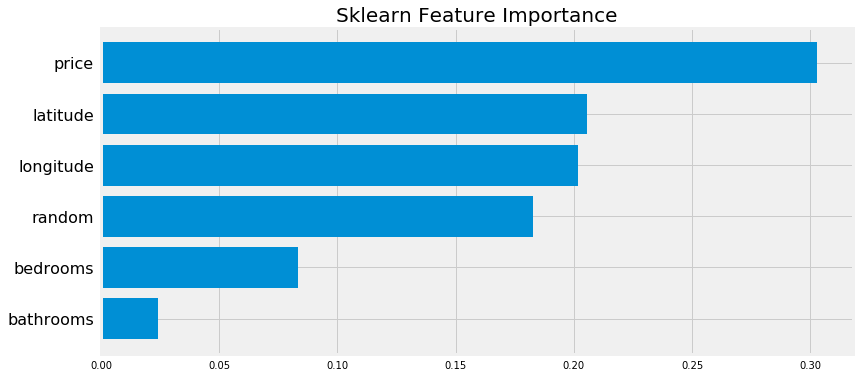

In [11]:
plot_feature_imp_v1(rf_clf, X_train, y_train, X_train.columns,
                    mode='sklearn', title='Sklearn Feature Importance')

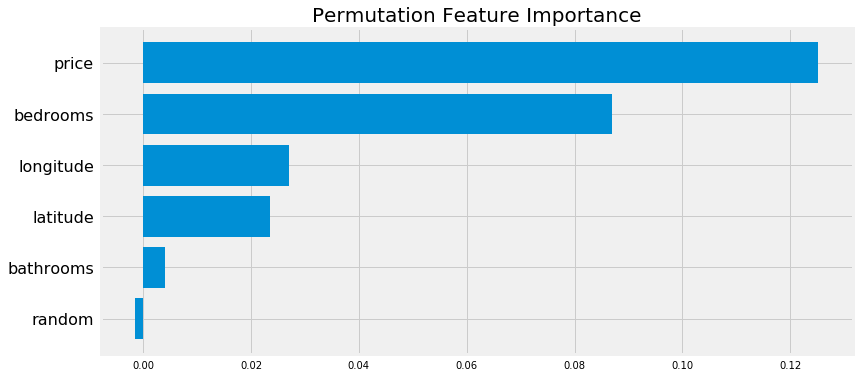

In [12]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='permutation', title='Permutation Feature Importance')

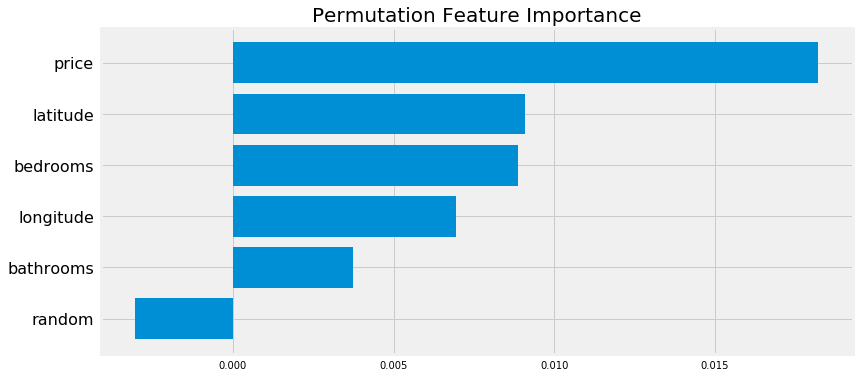

In [13]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='drop_column', title='Permutation Feature Importance')

# Add Duplicate Feature

In [14]:
# Add a duplicate for longtitude
X_train['longitude_dup'] = X_train['longitude']

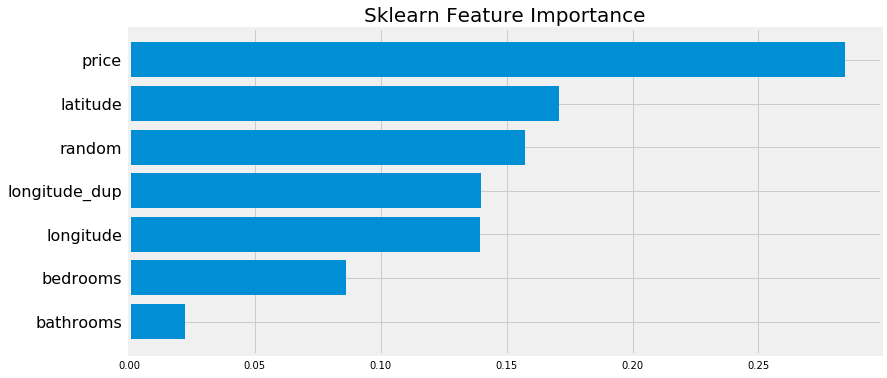

In [15]:
plot_feature_imp_v1(rf_clf, X_train, y_train, X_train.columns,
                    mode='sklearn', title='Sklearn Feature Importance')

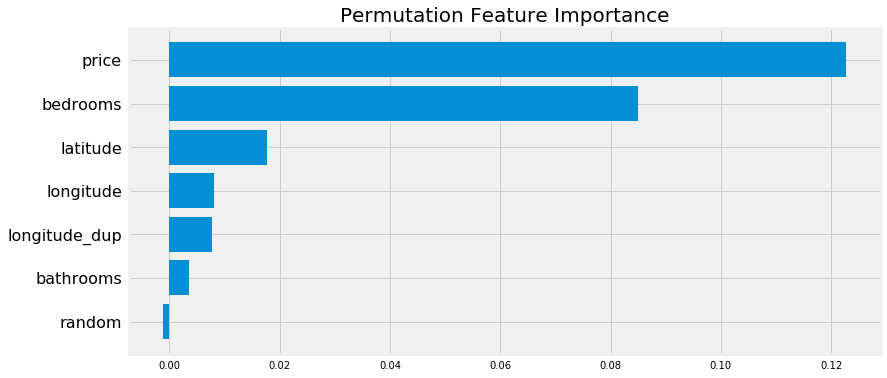

In [16]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='permutation', title='Permutation Feature Importance')

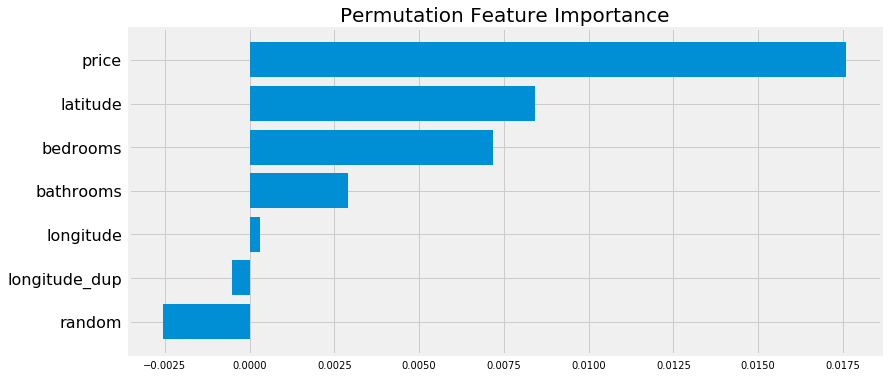

In [17]:
plot_feature_imp_v1(rf_clf, X_train.values, y_train.values, X_train.columns,
                    mode='drop_column', title='Permutation Feature Importance')

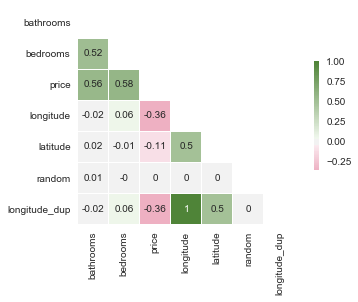

In [18]:
plot_corr_matrix(X_train, method='spearman')